In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import mols2grid

from rdkit import Chem
from rdkit.Chem import rdMolEnumerator
from src.utils import smi2mol

In [3]:
dataset = pd.read_csv('../data/tox24_full_dataset.csv').rename(columns={
    'DTXSID': 'id',
    'Chemical': 'name',
    'CASRN': 'cas',
    'SMILES': 'smi',
    'Library': 'lib',
    'Median % activity': 'target',
})
dataset.smi = dataset.smi.str.strip()
dataset['rdmol'] = dataset.smi.apply(Chem.MolFromSmiles)

In [4]:
mols2grid.display(dataset, smiles_col='smi')

MolGridWidget()

In [5]:
train = dataset.query('dataset == "training"')
test = dataset.query("dataset in ['blind test', 'leaderboard']")
train

id                                      name           cas  \
1     DTXSID1047364                                SSR 103800  1075752-90-7   
2     DTXSID9048512                                Ro 23-7637   107071-66-9   
4     DTXSID8047395  Diisononyl cyclohexane-1,2-dicarboxylate   166412-78-8   
5     DTXSID4041232                 1,3,5-Triisopropylbenzene      717-74-8   
6     DTXSID5044493          1-[3-(Triethoxysilyl)propyl]urea    23779-32-0   
...             ...                                       ...           ...   
1503  DTXSID1022053                      4,6-Dinitro-o-cresol      534-52-1   
1504  DTXSID5038888                              Basic Blue 7     2390-60-5   
1507  DTXSID1020485     C.I. Disperse Black 6 dihydrochloride    20325-40-0   
1508  DTXSID1020069                         o-Aminoazotoluene       97-56-3   
1510  DTXSID3040352                                   Dinocap    39300-45-3   

                                                    smi  lib  Max conc  \
1                                                        ph2   92.6160   
2     O=C(CCCCCCCCC1=CN=CC=C1)N1CCC(CC1)C=C(C1=CC=CC...  ph2   91.4785   
4          O=C(OCCCCCCC(C)C)C1C(C(=O)OCCCCCCC(C)C)CCCC1  ph2  100.0810   
5                        CC(C)C1=CC(=CC(=C1)C(C)C)C(C)C  e1k  100.0000   
6                           CCO[Si](CCCNC(N)=O)(OCC)OCC  ph2  100.0015   
...                                                 ...  ...       ...   
1503        CC1=C(O)C(=CC(=C1)[N+]([O-])=O)[N+]([O-])=O  ph2  100.0000   
1504  [Cl-].CCNC1=CC=C(C(C2=CC=C(C=C2)N(CC)CC)=C2C=C...  e1k   99.9950   
1507           Cl.Cl.COC1=CC(=CC=C1N)C1=CC=C(N)C(OC)=C1  ph2  100.0000   
1508                   CC1=CC=CC=C1N=NC1=CC(C)=C(N)C=C1  ph2  100.0015   
1510  CCCCCCCCc1cc(c(OC(=O)C=CC)c(c1)[N+](=O)[O-])[N...  e1k  100.0020   

          target Tested in CR?   dataset  \
1     -45.013995             N  training   
2     -38.289738             N  training   
4     -35.856721             N  training   
5     -31.837226             N  training   
6     -29.488758             N  training   
...          ...           ...       ...   
1503  109.914721             Y  training   
1504  110.318743             Y  training   
1507  110.448722             Y  training   
1508  111.003578             Y  training   
1510  111.080620             Y  training   

                                                 rdmol  
1     <rdkit.Chem.rdchem.Mol object at 0x7fc5f87d1a80>  
2     <rdkit.Chem.rdchem.Mol object at 0x7fc5f87d1af0>  
4     <rdkit.Chem.rdchem.Mol object at 0x7fc5f87d1bd0>  
5     <rdkit.Chem.rdchem.Mol object at 0x7fc5f87d1c40>  
6     <rdkit.Chem.rdchem.Mol object at 0x7fc5f87d1cb0>  
...                                                ...  
1503  <rdkit.Chem.rdchem.Mol object at 0x7fc5f882b140>  
1504  <rdkit.Chem.rdchem.Mol object at 0x7fc5f882b1b0>  
1507  <rdkit.Chem.rdchem.Mol object at 0x7fc5f882b300>  
1508  <rdkit.Chem.rdchem.Mol object at 0x7fc5f882b370>  
1510  <rdkit.Chem.rdchem.Mol object at 0x7fc5f882b450>  

[1012 rows x 10 columns]

In [6]:
test

id                                               name  \
0     DTXSID2029290                                   (-)-alpha-Pinene   
3     DTXSID9024194   (+/-)-2-(4-Chloro-2-methylphenoxy)propionic acid   
8     DTXSID8026727                (2E)-3,7-Dimethyl-2,6-octadien-1-ol   
9     DTXSID4034601                              (2R,6S)-Fenpropimorph   
10    DTXSID3047261  (2S,3S)-3-Methyl-2-(3-oxo-1,2-benzothiazol-2(3...   
...             ...                                                ...   
1501  DTXSID4022361                                        Vinclozolin   
1505  DTXSID1048176                                             YM 218   
1506  DTXSID1032648                                Z-Tetrachlorvinphos   
1509  DTXSID7026314                                    Zinc pyrithione   
1511  DTXSID9032581                                           Zoxamide   

              cas                                                smi     lib  \
0       7785-26-4                         CC1=CC[C@H]2C[C@@H]1C2(C)C     e1k   
3         93-65-2                      CC(OC1=C(C)C=C(Cl)C=C1)C(O)=O     e1k   
8        106-24-1                                CC(C)=CCC\C(C)=C\CO     ph2   
9      67564-91-4  CC(CN1C[C@H](C)O[C@H](C)C1)CC1=CC=C(C=C1)C(C)(C)C     e1k   
10    177785-47-6          CC[C@H](C)[C@H](N1SC2=CC=CC=C2C1=O)C(O)=O     ph2   
...           ...                                                ...     ...   
1501   50471-44-8           CC1(OC(=O)N(C1=O)C1=CC(Cl)=CC(Cl)=C1)C=C  ph1_v2   
1505  387816-82-2  OC(=O)\C=C\C(O)=O.CC1=C(C=CO1)C(=O)NC1=CC=C(C=...     ph2   
1506   22248-79-9       COP(=O)(OC)O\C(=C/Cl)C1=C(Cl)C=C(Cl)C(Cl)=C1     e1k   
1509   13463-41-7     [O-]1N2C=CC=CC2=[S][Zn++]11[O-]N2C=CC=CC2=[S]1     e1k   
1511  156052-68-5       CCC(C)(NC(=O)C1=CC(Cl)=C(C)C(Cl)=C1)C(=O)CCl  ph1_v2   

      Max conc  target Tested in CR?      dataset  \
0          NaN     NaN           NaN  leaderboard   
3          NaN     NaN           NaN   blind test   
8          NaN     NaN           NaN   blind test   
9          NaN     NaN           NaN   blind test   
10         NaN     NaN           NaN  leaderboard   
...        ...     ...           ...          ...   
1501       NaN     NaN           NaN   blind test   
1505       NaN     NaN           NaN  leaderboard   
1506       NaN     NaN           NaN   blind test   
1509       NaN     NaN           NaN   blind test   
1511       NaN     NaN           NaN   blind test   

                                                 rdmol  
0     <rdkit.Chem.rdchem.Mol object at 0x7fc5f87d1a10>  
3     <rdkit.Chem.rdchem.Mol object at 0x7fc5f87d1b60>  
8     <rdkit.Chem.rdchem.Mol object at 0x7fc5f87d1d90>  
9     <rdkit.Chem.rdchem.Mol object at 0x7fc5f87d1e00>  
10    <rdkit.Chem.rdchem.Mol object at 0x7fc5f87d1e70>  
...                                                ...  
1501  <rdkit.Chem.rdchem.Mol object at 0x7fc5f882b060>  
1505  <rdkit.Chem.rdchem.Mol object at 0x7fc5f882b220>  
1506  <rdkit.Chem.rdchem.Mol object at 0x7fc5f882b290>  
1509  <rdkit.Chem.rdchem.Mol object at 0x7fc5f882b3e0>  
1511  <rdkit.Chem.rdchem.Mol object at 0x7fc5f882b4c0>  

[500 rows x 10 columns]

# Filter empty smiles

Structures were taken from 

United States Environmental Protection Agency Site:

https://cdxapps.epa.gov/oms-substance-registry-services/search

In [7]:
train[train.smi == '']

id                                               name  \
1     DTXSID1047364                                         SSR 103800   
14    DTXSID2047696                                       Cremophor EL   
45    DTXSID1048122       Benzyl-C8-18-alkyldimethylammonium chlorides   
56    DTXSID0028666  1,2-Benzenedicarboxylic acid, di-C9-11-branche...   
129   DTXSID9047708                                      Igepal CO-890   
223   DTXSID4029565  1,2-Benzenedicarboxylic acid, diundecyl ester,...   
241   DTXSID1047526          C10-21 alkanesulfonic acids phenyl esters   
434   DTXSID2047517  Hexanedioic acid, di-C7-9-branched and linear ...   
452   DTXSID0029848  Acetic acid, C8-10-branched alkyl esters, C9-rich   
496   DTXSID5028665                                      DINP branched   
506   DTXSID4047597                                         Poloxalene   
529   DTXSID5047796                                           Formalin   
660   DTXSID3047394                               Grinstad Soft-N-Safe   
798   DTXSID3047712                                       Cornmint oil   
822   DTXSID6047527          Adipic acid, polypropyleneglycol, laurate   
868   DTXSID6021113                                     Peppermint oil   
1048  DTXSID7028774                     Alkyl (C12-C14) glycidyl ether   
1068  DTXSID3024528                                          Anise oil   
1233  DTXSID8044175                                     Clove leaf oil   
1450  DTXSID5029055                            4-Nonylphenol, branched   

               cas smi  lib  Max conc      target Tested in CR?   dataset  \
1     1075752-90-7      ph2   92.6160  -45.013995             N  training   
14      61791-12-6      e1k  100.0000  -22.029732             N  training   
45      63449-41-2      e1k  100.0035   -8.545316             N  training   
56      68515-49-1      ph2   99.9990   -5.733572             N  training   
129    NOCAS_47708      e1k  100.0000    2.789288             N  training   
223     85507-79-5      e1k   99.9960    6.083755             N  training   
241     91082-17-6      ph2  100.0000    6.508961             N  training   
434     68515-75-3      e1k   99.9970   11.588435             N  training   
452    108419-33-6      e1k  100.0400   12.260664             N  training   
496     68515-48-0      e1k   99.9980   13.376116             N  training   
506      9003-11-6      e1k  100.0000   13.703632             N  training   
529    NOCAS_47796      e1k  104.0765   14.641958             N  training   
660    NOCAS_47394      ph2  100.0000   21.160232             N  training   
798     68917-18-0      e1k  100.0000   32.159456             N  training   
822     66456-53-9      ph2  100.0000   34.274614             N  training   
868      8006-90-4      e1k  100.0000   37.773039             N  training   
1048    68609-97-2      e1k   59.4720   57.728175             N  training   
1068     8007-70-3      e1k  100.0000   60.839258             N  training   
1233     8000-34-8      ph2  100.0000   85.654032             Y  training   
1450    84852-15-3      ph2  100.0000  104.238453             Y  training   

                                                 rdmol  
1     <rdkit.Chem.rdchem.Mol object at 0x7fc5f87d1a80>  
14    <rdkit.Chem.rdchem.Mol object at 0x7fc5f87d2030>  
45    <rdkit.Chem.rdchem.Mol object at 0x7fc5f87d2dc0>  
56    <rdkit.Chem.rdchem.Mol object at 0x7fc5f87d3290>  
129   <rdkit.Chem.rdchem.Mol object at 0x7fc5f8805310>  
223   <rdkit.Chem.rdchem.Mol object at 0x7fc5f8807c30>  
241   <rdkit.Chem.rdchem.Mol object at 0x7fc5f88084a0>  
434   <rdkit.Chem.rdchem.Mol object at 0x7fc5f880d9a0>  
452   <rdkit.Chem.rdchem.Mol object at 0x7fc5f880e180>  
496   <rdkit.Chem.rdchem.Mol object at 0x7fc5f880f4c0>  
506   <rdkit.Chem.rdchem.Mol object at 0x7fc5f880f920>  
529   <rdkit.Chem.rdchem.Mol object at 0x7fc5f88103c0>  
660   <rdkit.Chem.rdchem.Mol object at 0x7fc5f8813d10>  
798   <rdkit.Chem.rdchem.Mol object at 0x7fc5f

In [8]:
# drop empty smiles
train = train[train.smi != ''].copy()

In [9]:
train['mol_count'] = train.smi.str.split('.').apply(len)

# Filter extended smiles

In [10]:
mask = train.smi.str.contains('[|]')
mols2grid.display(train[mask], smiles_col='smi')

MolGridWidget()

In [11]:
train[mask].cas

165     25265-71-8
322     25322-69-4
812     27306-78-1
943     26027-38-3
1006     9004-96-0
1182     9016-00-6
1359     9004-82-4
Name: cas, dtype: object

In [12]:
# Drop them as they are polymers
train = train[~mask].copy()

In [13]:
# mols2grid.display(train, smiles_col='smi', size=(200,100))
mols2grid.display(train.query('mol_count > 1'), smiles_col='smi', size=(200,100))

MolGridWidget()

# Preprocessing

### remove salts, water

In [14]:
from rdkit.Chem.SaltRemover import SaltRemover

remover = SaltRemover(defnData='[Cl,Na,K,N,O]')

# mols2grid.display(train.rdmol.apply(remover.StripMol))
mols2grid.display(train.query('mol_count > 1').rdmol.apply(remover.StripMol))

MolGridWidget()

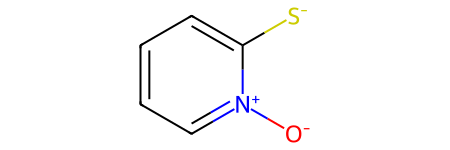

In [15]:
mol = Chem.MolFromSmiles('[N+](C)(C)(C)C.[Cl-]')
mol = Chem.MolFromSmiles('O=C([O-])CF.[Na+]')
mol = Chem.MolFromSmiles('[O-][n+]1ccccc1[S-]')
mol

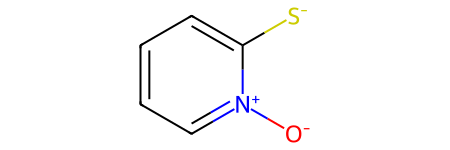

In [16]:
remover.StripMol(mol)

[13:14:11] Running Uncharger
[13:14:11] Removed negative charge.


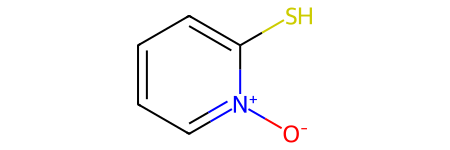

In [17]:
from rdkit.Chem.MolStandardize.rdMolStandardize import Cleanup, Reionize, Uncharger

uncharger = Uncharger()

uncharger.uncharge(remover.StripMol(mol))

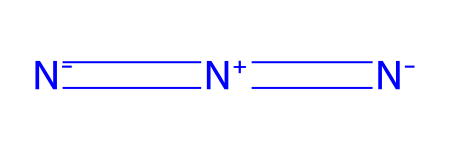

In [18]:
mol = Chem.MolFromSmiles('[N-]=[N+]=[N-]')
mol

[13:14:11] Running Uncharger


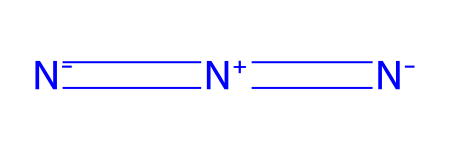

In [19]:
uncharger.uncharge(mol)

In [20]:
from rdkit.Chem.MolStandardize.rdMolStandardize import TautomerParent
from rdkit import RDLogger

RDLogger.DisableLog('rdApp.*')


def preprocess(mol):
    m = remover.StripMol(mol)
    m = uncharger.uncharge(m)
    # m = TautomerParent(m, skipStandardize=True)    
    m = TautomerParent(m)    
    return m

In [21]:
mols2grid.display(train.query('mol_count > 1').rdmol.apply(preprocess))

MolGridWidget()

In [22]:
mols2grid.display(train[train.smi.str.contains('Hg')], smiles_col='smi')

MolGridWidget()

In [23]:
mols2grid.display(test[test.smi.str.contains('Hg')], smiles_col='smi')
# mols2grid.display(test, smiles_col='smi')

MolGridWidget()

In [24]:
train.rdmol = train.rdmol.apply(preprocess)
train.smi = train.rdmol.apply(Chem.MolToSmiles)

In [25]:
mols2grid.display(train.query('mol_count > 1'), smiles_col='smi')

MolGridWidget()

# Models

In [26]:
# simply drop multiple molecules
mask = train.smi.str.contains('[.]')
train = train[~mask].copy()

In [27]:
mols2grid.display(train, smiles_col='smi')

MolGridWidget()

In [28]:
from src.fingerprints import get_fingerprints
from src.descriptors import get_rd_descriptors

def get_representation(smiles: str) -> np.ndarray | None:
    """
    This function computes the vector representation for a single molecule
    Representation consists of stacked vectors of fingerprints and rdkit descriptors in the following order:
     - morgan fingerprints, size MORGAN_FP_SIZE, radius MORGAN_RADIUS
     - avalon fingerprints, size AVALON_FP_SIZE
     - erg fingerprints, size ERG_FP_SIZE
     - rdkit descriptors, size RD_DESCS_SIZE
    """

    mol = Chem.MolFromSmiles(smiles)
    if not smiles or mol is None:  # for some weird reason empty smiles string produces a valid rdkit.Chem.Mol
        return
    
    fps = get_fingerprints(mol)
    descs = get_rd_descriptors(mol)
    return np.concatenate((fps, descs))

# train['repr'] = train.smi.apply(get_representation)


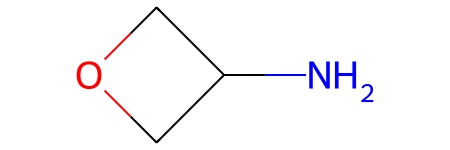

In [29]:
mol = smi2mol('NC1COC1')
mol

In [58]:
fp_config = {
    'morgan': {
        'n_bits': 1024,
        'radius': 2,
    },
    'avalon': {
        'n_bits': 1024,
    },
    'erg': {},
}

get_fingerprints(mol, fp_config).nonzero()

(array([  29,  147,  523,  611,  656,  808,  899,  926,  960, 1019, 1028,
        1039, 1047, 1056, 1073, 1083, 1105, 1109, 1110, 1145, 1149, 1166,
        1187, 1239, 1244, 1289, 1298, 1308, 1332, 1346, 1347, 1364, 1393,
        1399, 1442, 1453, 1478, 1503, 1531, 1593, 1603, 1621, 1637, 1715,
        1758, 1796, 1817, 1840, 1844, 1890, 1910, 1918, 1950, 2012, 2024,
        2029, 2063, 2064, 2065, 2104, 2105, 2106, 2133, 2134, 2135, 2147,
        2148, 2149, 2174, 2175, 2176, 2230, 2231, 2232]),)

In [52]:
from src.descriptors import RD_DESCRIPTORS, MORD_DESCRIPTORS

desc_config = {
    'rdkit': [RD_DESCRIPTORS],
    'mord': [MORD_DESCRIPTORS],
}

In [60]:
FPS_OFFSET = 1024 + 1024 + 315
FPS_OFFSET

2363

In [68]:
from src.descriptors import RD_DESCRIPTORS

mask_2d = np.stack(train.repr.apply(pd.notna).values)

desc_ids = np.where(mask_2d == False)[1] - FPS_OFFSET
desc_ids

array([39, 41, 43, 45, 39, 41, 43, 45, 39, 41, 43, 45, 39, 41, 43, 45])

In [67]:
set(np.array(RD_DESCRIPTORS)[desc_ids])

{np.str_('MaxAbsPartialCharge'),
 np.str_('MaxPartialCharge'),
 np.str_('MinAbsPartialCharge'),
 np.str_('MinPartialCharge')}

In [70]:
from mordred import Calculator, descriptors
mord_calc = Calculator(descriptors, ignore_3D=True)

def get_md_descriptors(mol) -> np.ndarray:
    mord_calc(mol)

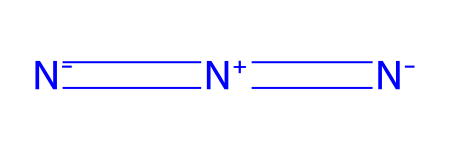

In [69]:
mol

ABC      ABCGG  nAcid  nBase    SpAbs_A   SpMax_A  SpDiam_A  \
396   15.384261  13.247155      0      0  23.984541  2.383105  4.766211   
893    9.629947   8.672233      2      0  16.053348  2.000000  4.000000   
906   15.812727  13.992121      0      0  25.643633  2.460466  4.775616   
1186  15.831998  13.402511      0      0  26.292482  2.396572  4.793144   
1462  12.497571  10.438650      2      0  20.985553  2.121312  4.242624   
454    5.875634   5.943785      0      0  10.251662  1.961571  3.923141   
376   15.402288  13.945057      0      0  24.489494  2.392090  4.756667   
931    8.554231   7.309128      0      0  14.426921  2.333244  4.666488   
1005   9.968445   8.418999      0      0  17.139200  2.299619  4.599237   
514    7.427747   7.165349      0      0  11.683239  2.302776  4.605551   

         SpAD_A   SpMAD_A   LogEE_A  ...     SRW10     TSRW10          MW  \
396   23.984541  1.199227  3.909448  ...  9.854980  53.522357  281.162708   
893   16.053348  1.146668  3.460649  ...  8.241967  42.543530  202.120509   
906   25.643633  1.221125  3.956658  ...  9.908724  69.009026  366.986864   
1186  26.292482  1.252023  3.950603  ...  9.861363  54.606394  323.038116   
1462  20.985553  1.165864  3.717926  ...  8.726643  48.326967  280.180346   
454   10.251662  1.139074  3.007497  ...  7.609367  34.745525  132.078644   
376   24.489494  1.224475  3.911253  ...  9.796626  66.558798  295.108754   
931   14.426921  1.311538  3.341737  ...  9.225721  41.498380  143.073499   
1005  17.139200  1.318400  3.491227  ...  9.221181  43.914478  180.151415   
514   11.683239  1.168324  3.206353  ...  9.066585  39.732715  134.109550   

            AMW  WPath  WPol  Zagreb1  Zagreb2  mZagreb1  mZagreb2  
396    6.538668    825    30    102.0    117.0  8.388889  4.333333  
893    6.316266    433    11     54.0     52.0  6.222222  3.416667  
906   10.194080    959    31    106.0    123.0  8.118056  4.791667  
1186   9.229660    966    31    104.0    119.0  7.506944  4.777778  
1462   5.961284    926    15     72.0     70.0  7.312500  4.375000  
454    6.289459    114     6     32.0     30.0  4.361111  2.333333  
376    7.766020    802    27    102.0    116.0  7.868056  4.305556  
931    7.153675    144    14     56.0     64.0  3.083333  2.444444  
1005   5.459134    252    16     64.0     72.0  3.583333  2.944444  
514    5.587898    111    13     48.0     54.0  4.944444  2.222222  

[10 rows x 1613 columns]

In [505]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import seaborn as sns


mae = 'neg_mean_absolute_error'
mse = 'neg_mean_squared_error'
N_JOBS = 24
RANDOM_SEED = 42

# prepare models
models = {}

# models['LR'] = LinearRegression()
models['Ridge'] = Ridge()
models['PLS'] = PLSRegression()
models['DT'] = DecisionTreeRegressor(random_state=RANDOM_SEED)
models['Lasso'] = Lasso()
models['KNN'] = KNeighborsRegressor(n_jobs=N_JOBS)
models['SVR'] = SVR(C=5)
models['RF'] = RandomForestRegressor(n_estimators=400, random_state=RANDOM_SEED, n_jobs=N_JOBS)
models['XGB'] = xgb.XGBRegressor(random_state=RANDOM_SEED, n_jobs=N_JOBS, verbosity=0)

In [506]:
mask = train.repr.apply(pd.notna).apply(all)
mask.sum()

957

In [507]:
X_train = np.stack(train[mask].repr.values)
y_train = train[mask].target

X_train.shape, y_train.shape

((957, 2563), (957,))

In [508]:
np.isnan(X_train).sum()

0

In [509]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline

class OffsetScaler(TransformerMixin, BaseEstimator):
    """
    Applies StandardScaler the part of the input vector. Only values after offset are transformed [offset:],
    while keeping intact the initial part of vector [:offset].
    """
        
    def __init__(self, offset=0):
        self.offset = offset
        self.scaler = None

    def fit(self, X, y=None):
        self.scaler = StandardScaler().fit(X[:, self.offset:])
        return self
        

    def transform(self, X, y=None):
        x_fix = X[:, :self.offset]
        x_scale = self.scaler.transform(X[:, self.offset:])
        x_trans = np.hstack([x_fix, x_scale])
        return x_trans


FPS_OFFSET = 1024 + 1024 + 315

scaler = OffsetScaler(offset=FPS_OFFSET)
X_train_scale = scaler.fit_transform(X_train)    

In [510]:
from sklearn.model_selection import KFold, cross_val_score

for name, model in models.items():
    score = cross_val_score(model, X_train_scale, y_train, cv=10, scoring='neg_root_mean_squared_error')
    print(name, round(score.mean(), 3), round(score.std(), 3))

Ridge -40.485 5.441
PLS -30.584 9.921
DT -35.31 6.714
Lasso -30.629 13.051
KNN -29.25 9.524
SVR -30.212 14.954
RF -25.328 8.72
XGB -26.167 7.16


In [462]:
best_xgb = models['XGB'].fit(X_train_scale, y_train)

In [461]:
ensemble = []

names = ['PLS', 'KNN', 'SVR', 'RF', 'XGB']

for name in names:    
    model = models[name].fit(X_train_scale, y_train)
    ensemble.append(model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=24,
             num_parallel_tree=None, random_state=42, ...)

In [388]:
df = pd.read_csv('../data/raw/tox24_challenge_test.csv')

SMILES
0                                                                                                                                                                                     CC1=CC[C@H]2C[C@@H]1C2(C)C
1                                                                                                                                                                                  CC(OC1=C(C)C=C(Cl)C=C1)C(O)=O
2                                                                                                                                                                                           CC(C)=CCC/C(/C)=C/CO
3                                                                                                                                                              CC(CN1C[C@H](C)O[C@H](C)C1)CC2=CC=C(C=C2)C(C)(C)C
4                                                                                                                                                                      CC[C@H](C)[C@H](N1SC2=CC=CC=C2C1=O)C(O)=O
..                                                                                                                                                                                                           ...
495                                                                                                                                                                     CC1(OC(=O)N(C1=O)C2=CC(Cl)=CC(Cl)=C2)C=C
496  FC1(F)/C(=C\C(=O)N2CCC(N3CCCCC3)CC2)/C=4C(N(CC1)C(=O)C5=CC=C(NC(=O)C6=C(OC=C6)C)C=C5)=CC=CC4.FC1(F)/C(=C\C(=O)N2CCC(N3CCCCC3)CC2)/C=4C(N(CC1)C(=O)C5=CC=C(NC(=O)C6=C(OC=C6)C)C=C5)=CC=CC4.OC(=O)/C=C/C(O)=O
497                                                                                                                                                                COP(=O)(OC)O/C(=C\Cl)/C1=C(Cl)C=C(Cl)C(Cl)=C1
498                                                                                                                                                           C1=CC=N(=O)C([S-])=C1.C1=CC=N(=O)C([S-])=C1.[Zn+2]
499                                                                                                                                                                 CCC(C)(NC(=O)C1=CC(Cl)=C(C)C(Cl)=C1)C(=O)CCl

[500 rows x 1 columns]

In [390]:
df['rdmol'] = df.SMILES.apply(Chem.MolFromSmiles)

In [391]:
df['smi'] = df.rdmol.apply(preprocess).apply(Chem.MolToSmiles)

In [393]:
df['repr'] = df.smi.apply(get_representation)

In [394]:
mask = df.repr.apply(pd.notna).apply(all)

498

In [417]:
X_test = np.stack(df.repr.values)
np.isnan(X_test).sum()

8

In [418]:
X_test = np.nan_to_num(X_test)
X_test.shape

(500, 2563)

In [419]:
X_test_scale = scaler.transform(X_test)

array([ 12.205484  ,  81.59699   ,  43.231033  ,  19.391928  ,
        25.231651  , 100.1825    ,  14.903661  ,  47.12654   ,
        43.231033  ,  33.442238  ,  79.05484   ,  84.54583   ,
        34.739418  ,  73.247314  ,  20.592396  ,  15.631713  ,
        39.11572   ,  15.226639  ,  37.23028   ,  -4.1991134 ,
        10.215177  ,  42.59376   ,   3.7328448 ,  11.311777  ,
        38.283012  ,  97.666855  ,   5.165727  ,  25.486116  ,
        11.234337  ,  56.52309   ,  20.61093   ,  24.306158  ,
         7.929378  ,   4.684994  ,  63.561234  ,   8.776195  ,
        70.0441    ,  93.00666   ,  15.2973175 ,   6.556215  ,
        21.63443   ,  85.62519   ,  58.274174  ,  26.590864  ,
        87.73746   ,   5.234366  ,  58.739944  ,  73.33243   ,
        12.090604  ,  42.70702   ,   4.268853  ,  45.621235  ,
        35.835873  ,  23.377449  ,   1.3912538 ,  11.234186  ,
        36.99049   ,  29.239029  ,  99.52236   ,  73.83956   ,
         8.15474   ,   9.519847  ,   7.82882   , 108.04

In [460]:
results = pd.Series(best_xgb.predict(X_test_scale), name='Results')
results.to_csv('baseline_xgb_rdkit_fps.csv', index=False)

In [463]:
results = pd.Series([0] * X_test_scale.shape[0],name='Results')

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Results, Length: 500, dtype: int64

In [464]:
for model in ensemble:
    results += model.predict(X_test_scale)

results /= len(ensemble)

In [466]:
results.to_csv('ensemble_rdkit_fps.csv', index=False)